**Introduction**

The moving average filter is a simple Low Pass FIR (Finite Impulse Response) filter commonly used for smoothing an array of sampled data/signal. It takes M samples of input at a time and take the average of those M-samples and produces a single output point. It is a very simple LPF (Low Pass Filter) structure that comes handy for scientists and engineers to filter unwanted noisy component from the intended data.
As the filter length increases ( the parameter M ) the smoothness of the output increases, whereas the sharp transitions in the data are made increasingly blunt. This implies that this filter has excellent time domain response but a poor frequency response.

The MA filter perform three important functions:

1) It takes M input points, computes the average of those M-points and produces a single output point
2) Due to the computation/calculations involved , the filter introduces a definite amount of delay
3) The filter acts as a Low Pass Filter (with poor frequency domain response and a good time domain response)[1].

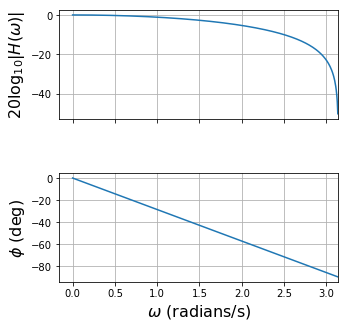

In [1]:
%matplotlib inline
from __future__ import division
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt

#this here only adjust the aspect of the plots
fig, axs = plt.subplots(2,1,sharex=True)
plt.subplots_adjust( hspace = .5 )
fig.set_size_inches((5,5))

ax=axs[0]
w,h=signal.freqz([1/2., 1/2.],1) #we compute impulse response for the filter above (coefficients)
ax.plot(w,20*np.log10(abs(h))) #we plot the logarithmic response as a function of the frequency in radians
ax.set_ylabel(r"$20 \log_{10} |H(\omega)| $",fontsize=16)
ax.grid()

ax=axs[1]
ax.plot(w,np.angle(h)/np.pi*180) #we compute the phase of the response in degrees
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=16)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.grid()


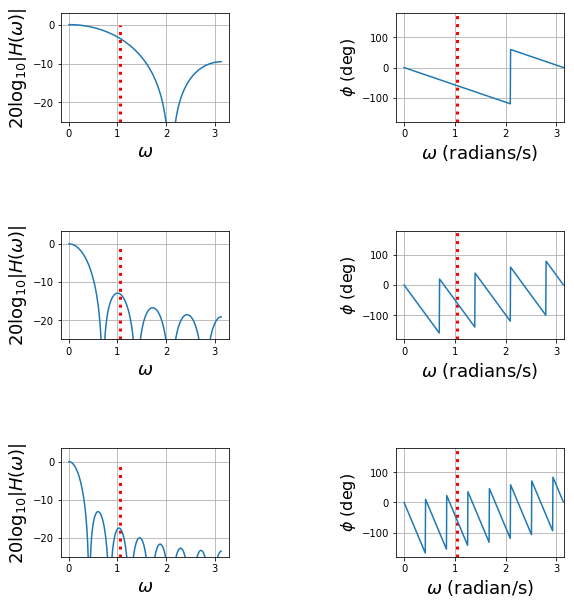

In [2]:
from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(3,3)
gs.update( wspace=1.0, hspace=1.0)

ax = fig.add_subplot(plt.subplot(gs[0,0]))

ma_length = 3 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ma_length = 9 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ma_length = 15 #moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax= fig.add_subplot(plt.subplot(gs[2,0]))
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$20\log_{10}|H(\omega)|$",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[2,0]))
ax = fig.add_subplot(plt.subplot(gs[2,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radian/s)',fontsize=18)
ax.set_ylabel(r"$\phi$ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

Here we have seen the output using three different filters.

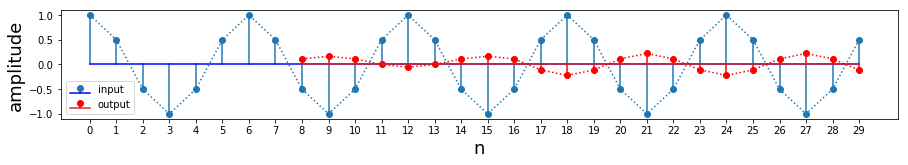

In [4]:
fig=plt.figure()
fig.set_size_inches((15,10))
ma_length=9
ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=30
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/3.)  #building the signal with a frequency of 2pi/6
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)  #applying the filter that uses 8 coefficients that are equal to 1

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);

**References**

1> *"Digital modulations using MATLAB"*-Mathuranathan Viswanathan.
